<a href="https://colab.research.google.com/github/MathAugusto/python-analytics/blob/main/911_analytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

In [2]:
# Import e análise do DataFrame
df = pd.read_csv("911.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# Top zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
# Top townships for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
# Number of unique title codes for 911 calls
df['title'].nunique()

110

In [8]:
# Criando coluna "Reason" para separar title por "EMS", "Trafic", "Fire"

In [9]:
df['reason'] = df['title'].apply(lambda title: title.split(":")[0])

In [10]:
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [11]:
# Count of number of Reasons -  911 calls
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

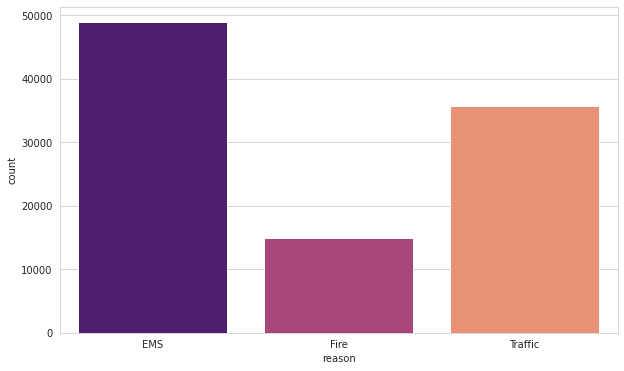

In [12]:
# Visualization - count of number of Reasons -  911 calls
fig = plt.figure(figsize= (10,6))
sns.countplot(x = "reason", data=df, palette="magma")

In [13]:
# Converter string para timestamp
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
type(df['timeStamp'])

pandas.core.series.Series

In [15]:
# Criando novas colunas para Hour, Month e Day Of Week 
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day_of_week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [17]:
# Tranformar de numero para dia da semana na coluna "day_of_week"

In [18]:
dmap = {0:"Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}

In [19]:
df['day_of_week'] = df['day_of_week'].map(dmap)

Text(0.5, 1.0, 'Day of Week x Reason')

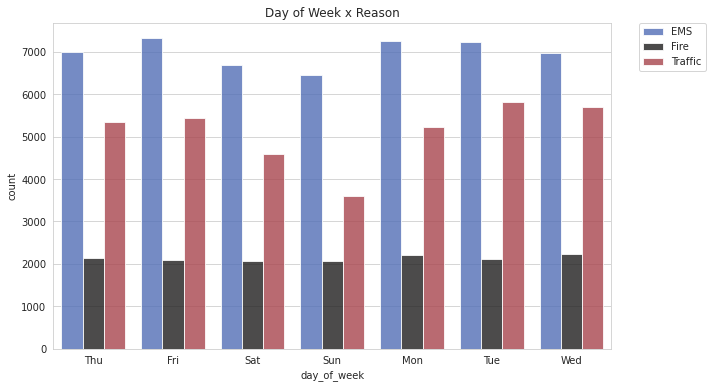

In [20]:
# Visualization: Day of Week x Reason
fig = plt.figure(figsize= (10,6))
sns.countplot(x="day_of_week", data=df, hue="reason", palette="icefire", alpha=0.8)
# Retirando a legenda de cima do grááfico:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Day of Week x Reason")

Text(0.5, 1.0, 'Month x Reason')

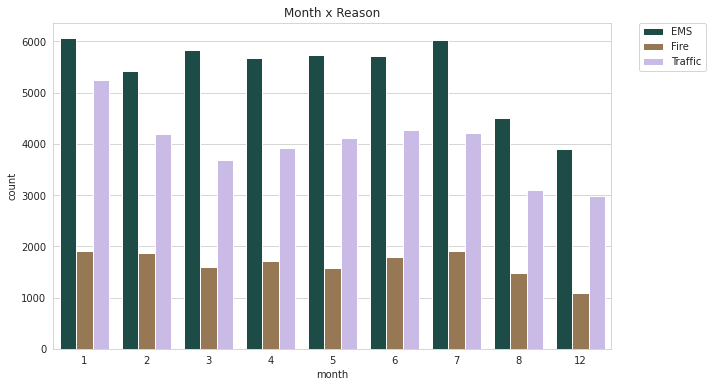

In [21]:
# Visualization: Month x Reason
fig = plt.figure(figsize= (10,6))
sns.countplot(x="month", data=df, hue="reason", palette="cubehelix")
# Retirando a legenda de cima do grááfico:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Month x Reason")

In [22]:
# Agrupando por mês em um DataFrame
por_mes = df.groupby('month').count()

In [23]:
por_mes.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day_of_week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


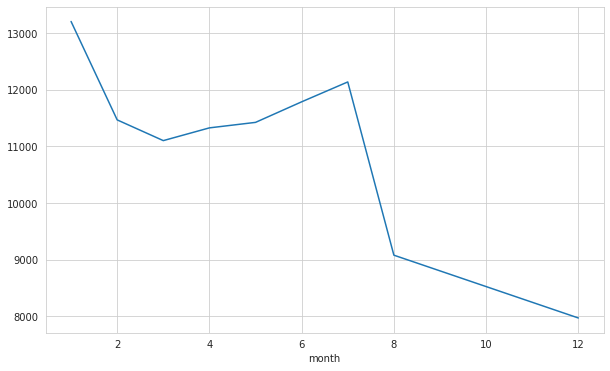

In [24]:
# Plot do total de chamadas por mês ao longo do tempo
fig = plt.figure(figsize= (10,6))
por_mes["lat"].plot()

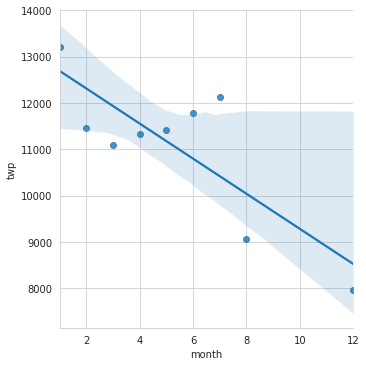

In [25]:
# Plot de regressao e Reset no index Month, para ele virar uma coluna
sns.lmplot(x='month', y='twp', data=por_mes.reset_index())

In [26]:
# Criando nova coluna de Date
df['date'] = df["timeStamp"].apply(lambda t: t.date())

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [28]:
df.groupby('date').count()['lat']

date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

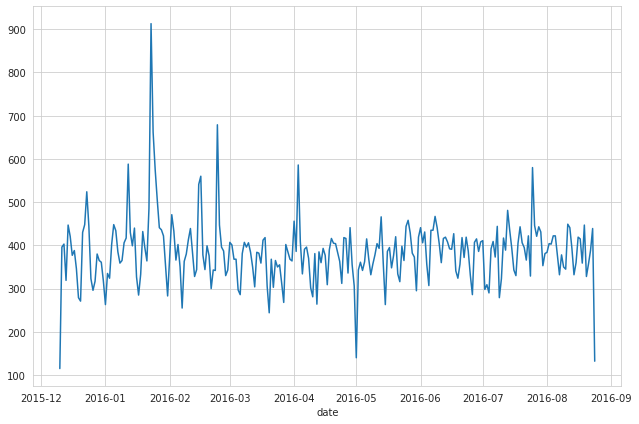

In [29]:
# Plot do agrupamento de chamada ao longo do tempo
fig = plt.figure(figsize= (9,6))
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

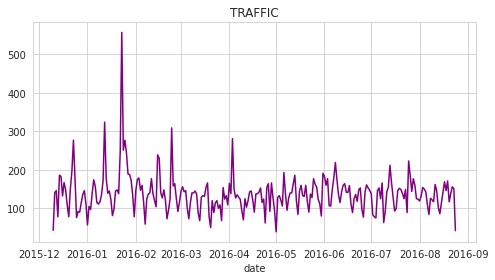

In [30]:
# Traffic
fig = plt.figure(figsize= (7,4))
df[df['reason'] == 'Traffic'].groupby('date').count()['lat'].plot(color='purple')
plt.title('TRAFFIC')
plt.tight_layout()

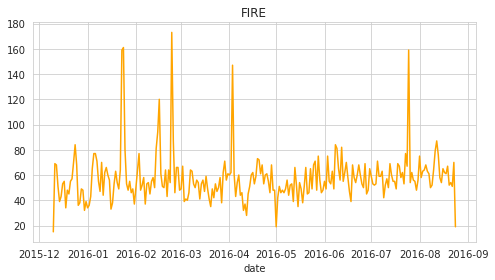

In [31]:
# Fire
fig = plt.figure(figsize= (7,4))
df[df['reason'] == 'Fire'].groupby('date').count()['lat'].plot(color="orange")
plt.title('FIRE')
plt.tight_layout()

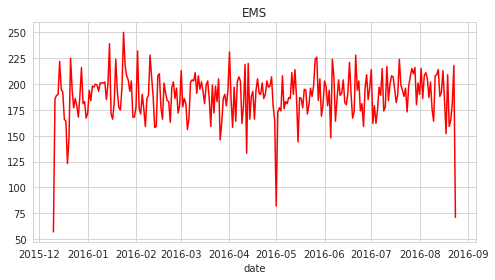

In [32]:
# EMS
fig = plt.figure(figsize= (7,4))
df[df['reason'] == 'EMS'].groupby('date').count()['lat'].plot(color='red')
plt.title('EMS')
plt.tight_layout()

In [33]:
# Criando uma tabela nova: Horas x Dia da Semana
# Poderia ser usado uma pivot table do pandas tambem
dayHour = df.groupby(by=['day_of_week', 'hour']).count()['reason'].unstack()

In [34]:
dayHour

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,840,838,887,917,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,800,789,903,872,904,867,990,1037,894,686,668,575,490,335


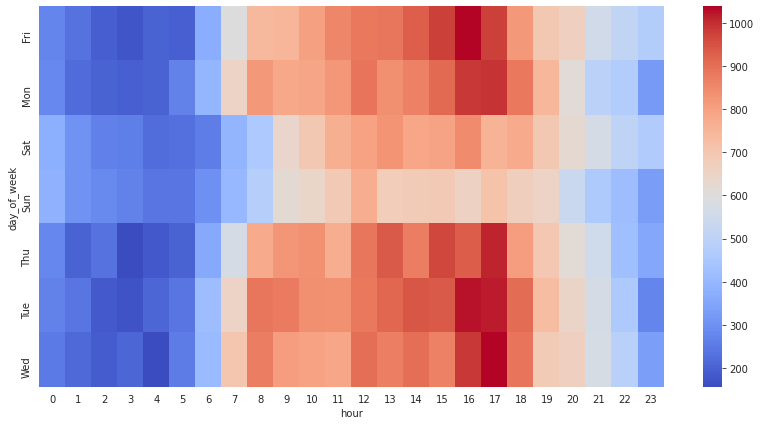

In [35]:
# Heatmap Dia x Hora
fig = plt.figure(figsize= (14,7))
sns.heatmap(dayHour, cmap='coolwarm')

<Figure size 1008x504 with 0 Axes>

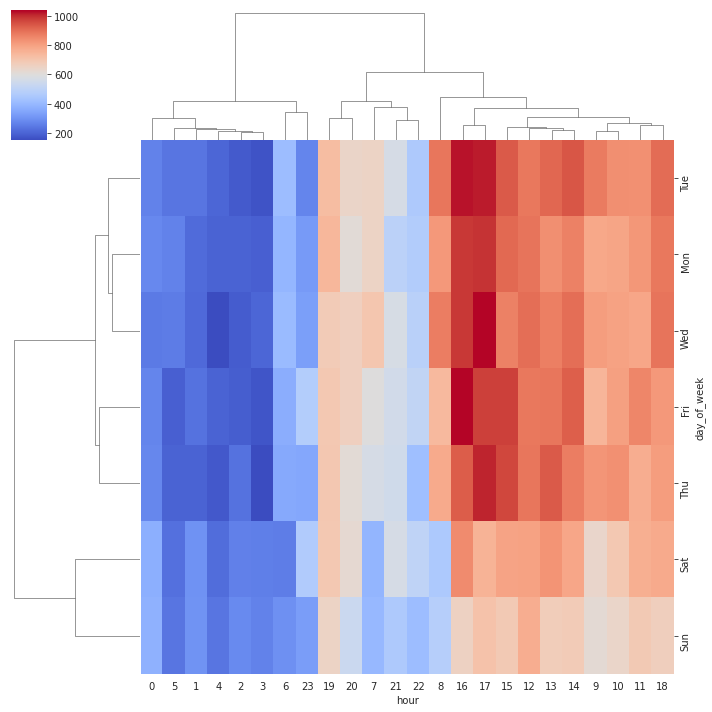

In [36]:
# Clustermap Dia x Hora
fig = plt.figure(figsize= (14,7))
sns.clustermap(dayHour, cmap='coolwarm')

In [37]:
# Criando uma tabela nova: Meses x Dia da Semana
dayMonth = df.groupby(by=['day_of_week', 'month']).count()['reason'].unstack()

In [38]:
dayMonth

month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


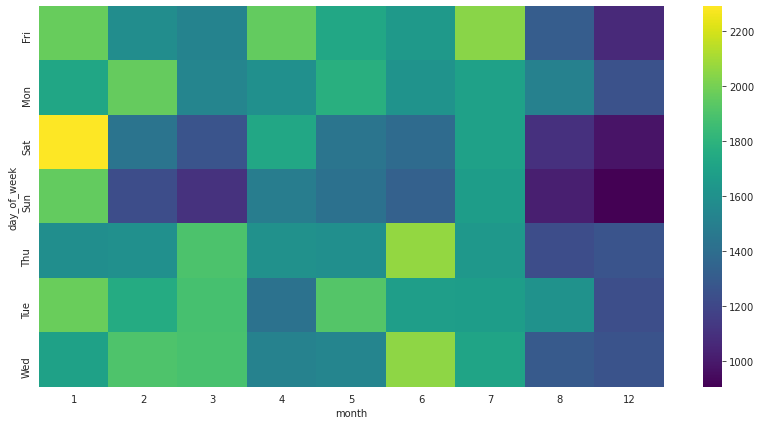

In [39]:
# Heatmap Dia x Mês
fig = plt.figure(figsize= (14,7))
sns.heatmap(dayMonth, cmap='viridis')

<Figure size 1008x504 with 0 Axes>

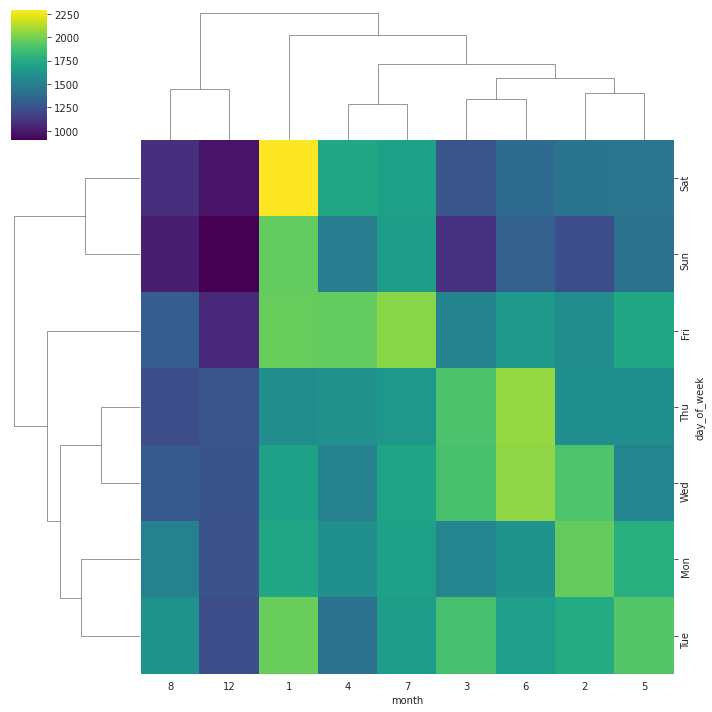

In [40]:
# Clustermap Dia x Mês
fig = plt.figure(figsize= (14,7))
sns.clustermap(dayMonth, cmap='viridis')